In [1]:
# https://www.youtube.com/watch?v=Xus_Qno_kfg&ab_channel=FewSteps
import re
import json
import csv
from io import StringIO
from bs4 import BeautifulSoup
import requests
import os
from time import sleep
from IPython.display import clear_output
import lxml
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from datetime import datetime
def getCurrPrice(stock, afterhours=False):
  url='https://finance.yahoo.com/quote/{}/'
  response=requests.get(url.format(stock))
  #soup=BeautifulSoup(response.text,'lxml')
  soup=BeautifulSoup(response.text,"html.parser")
  # price=soup.findall('div',{'class':'Trsdu(0.3s) Fw(b) Fz(36px) Mb(-4px) D(ib)'})
  # #soup

  price=soup.find_all('div',{'class':'My(6px) Pos(r) smartphone_Mt(6px)'})
  if afterhours:
        price=price[0].find('p').text.split(' ')[0]
  else:
    price=price[0].find('span').text
  #print('\r',price,end='')
  return price

In [2]:
from datetime import datetime

#nowx = now()

#current_time = datetime.strptime("%H:%M:%S")

# current_time
# now
str_format="%H:%M:%S"
open_=datetime.strptime("16:30:00",str_format)
close_=datetime.strptime("23:00:00",str_format)
#currtime=datetime.datetime.now().time()
# starttrade=datetime.time( 16,30,0 )
# endtrade=datetime.time( 23,0,0 )
now=datetime.strptime(str(datetime.now()).split(" ")[1].split(".")[0],str_format) 

#str(datetime.now()).split(" ")[1].split(".")[0]
print(now)
print(close_)
now>close_

now<close_
open_>now

from datetime import datetime, time

def is_time_between(begin_time, end_time, check_time=None):
    # If check time is not given, default to current UTC time
#    check_time = check_time or datetime.utcnow().time()
    check_time = check_time or datetime.now().time()
    if begin_time < end_time:
        return check_time >= begin_time and check_time <= end_time
    else: # crosses midnight
        return check_time >= begin_time or check_time <= end_time

# Original test case from OP
is_time_between(time(16,30), time(23,0))

# Test case when range crosses midnight
#is_time_between(time(23,0), time(16,30))
is_time_between(time(16,30), time(23,0)) and not(is_time_between(time(23,0), time(16,30)))

1900-01-01 22:36:43
1900-01-01 23:00:00


True

In [3]:
import winsound
frequency = 60  # Set Frequency To 2500 Hertz
duration = 1000  # Set Duration To 1000 ms == 1 second
def plotRT(stock, ah):
  price=[float(getCurrPrice(stock, ah))]
  x=[0]
  while True:

    
    print(stock,' = ',price[-1])
    print('MAX = ',max(price))
    print('MIN = ',min(price))

    price.append(float(getCurrPrice(stock, ah)))
    if price[-1]>=1.885 or price[-1]<=1.865:
        
        winsound.Beep(frequency, duration)
    x.append(x[-1]+1)
    #print(pricex,'\t',x)
    
    plt.plot(x,price)
    plt.axhline(y=max(price), color='r', linestyle='-')
    plt.axhline(y=min(price), color='y', linestyle='-')
    plt.show()
    #clear_output(wait=True)
    plt.pause(1)
    clear_output(wait=False)
    #clear()
    
    
    


In [4]:
stock='ngd'
url='https://finance.yahoo.com/quote/{}/'
response=requests.get(url.format(stock))
#soup=BeautifulSoup(response.text,'lxml')
soup=BeautifulSoup(response.text,"html.parser")
# price=soup.findall('div',{'class':'Trsdu(0.3s) Fw(b) Fz(36px) Mb(-4px) D(ib)'})
# #soup

#price=soup.find_all('div',{'class':'My(6px) Pos(r) smartphone_Mt(6px)'})[0].find('span').text
pricea=soup.find_all('div',{'class':'My(6px) Pos(r) smartphone_Mt(6px)'})
#pricea=soup.find_all('div',{'class':'C($primaryColor) Fz(24px) Fw(b)'})#[0].find('span').text
pricea
#ricea0].find('p').text.split(' ')[0]

[<div class="My(6px) Pos(r) smartphone_Mt(6px)" data-reactid="29"><div class="D(ib) Va(m) Maw(65%) Ov(h)" data-reactid="30"><div class="D(ib) Mend(20px)" data-reactid="31"><span class="Trsdu(0.3s) Fw(b) Fz(36px) Mb(-4px) D(ib)" data-reactid="32">1.8550</span><span class="Trsdu(0.3s) Fw(500) Pstart(10px) Fz(24px) C($positiveColor)" data-reactid="33">+0.1450 (+8.48%)</span><div class="C($tertiaryColor) D(b) Fz(12px) Fw(n) Mstart(0)--mobpsm Mt(6px)--mobpsm" data-reactid="34" id="quote-market-notice"><span data-reactid="35">As of  3:36PM EDT. Market open.</span></div></div></div><div class="D(ib) Mstart(30px) Va(t) uba-container" data-reactid="36"><div class="uba-container D-n D(n)" data-reactid="37" id="defaultTRADENOW-sizer"><!-- react-text: 38 --><!-- /react-text --><div class="" data-reactid="39" id="defaultTRADENOW-wrapper"><div id="defaultdestTRADENOW" style=""></div></div></div></div></div>]

In [5]:
is_time_between(time(16,30), time(23,0)) and not(is_time_between(time(23,0), time(16,30)))

True

ngd  =  1.85
MAX =  1.87
MIN =  1.85


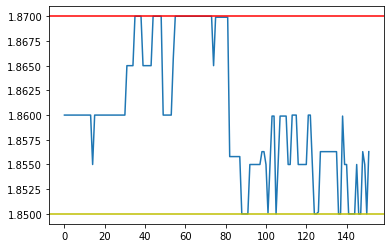

In [ ]:
from datetime import datetime, time

def is_time_between(begin_time, end_time, check_time=None):
    # If check time is not given, default to current UTC time
#    check_time = check_time or datetime.utcnow().time()
    check_time = check_time or datetime.now().time()
    if begin_time < end_time:
        return check_time >= begin_time and check_time <= end_time
    else: # crosses midnight
        return check_time >= begin_time or check_time <= end_time

# Original test case from OP
#is_time_between(time(16,30), time(23,0))

while True:
    try:
        if is_time_between(time(16,30), time(23,0)) and not(is_time_between(time(23,0), time(16,30))):
            ah=False
        else:
            ah=True
        plotRT('ngd', ah)
    except:
        print("connection lost")
